In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np

In [3]:
sys.path.append('../../')

In [4]:
import SimulationFramework.Framework as fw

In [26]:
basedir=r'C:\Users\jkj62\Documents\GitHub\ASTRA_COMPARISONRunner-HMCC\dist\output\SimulationDatabase'
dir='a8041d43-ddea-493d-af59-adc34458b686'
fwdir = fw.load_directory(basedir+'/'+dir, beams=True)

# Needs fastKDE
pip install cython, fastkde

In [23]:
from fastkde import fastKDE
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = (20,20)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['figure.dpi'] = 70 # 200 e.g. is really fine, but slower%matplotlib inline

In [7]:
def plotScreenImage(beam, scale=1, colormap=plt.cm.jet):
    #Do the self-consistent density estimate
    myPDF,axes = fastKDE.pdf(1e3*(beam.x-np.mean(beam.x)),1e3*(beam.y-np.mean(beam.y)))
    v1,v2 = axes
    myPDF=myPDF/myPDF.max()*scale

    fig, ax = plt.subplots()
    ax.set_aspect(1)
    #ax.xaxis.set_visible(False)
    #ax.yaxis.set_visible(False)
    draw_circle = plt.Circle((0,0), 1e3*0.015, fill=True, ec='w', fc=colormap(0), zorder=-1)
    ax.add_artist(draw_circle)
    ax.set_facecolor('k')
    plt.pcolormesh(v1,v2,myPDF, cmap=colormap, shading='auto', vmax=1);
    ax.set_xlim([1e3*-0.016, 1e3*0.016])
    ax.set_ylim([1e3*-0.016, 1e3*0.016])
    plt.show()

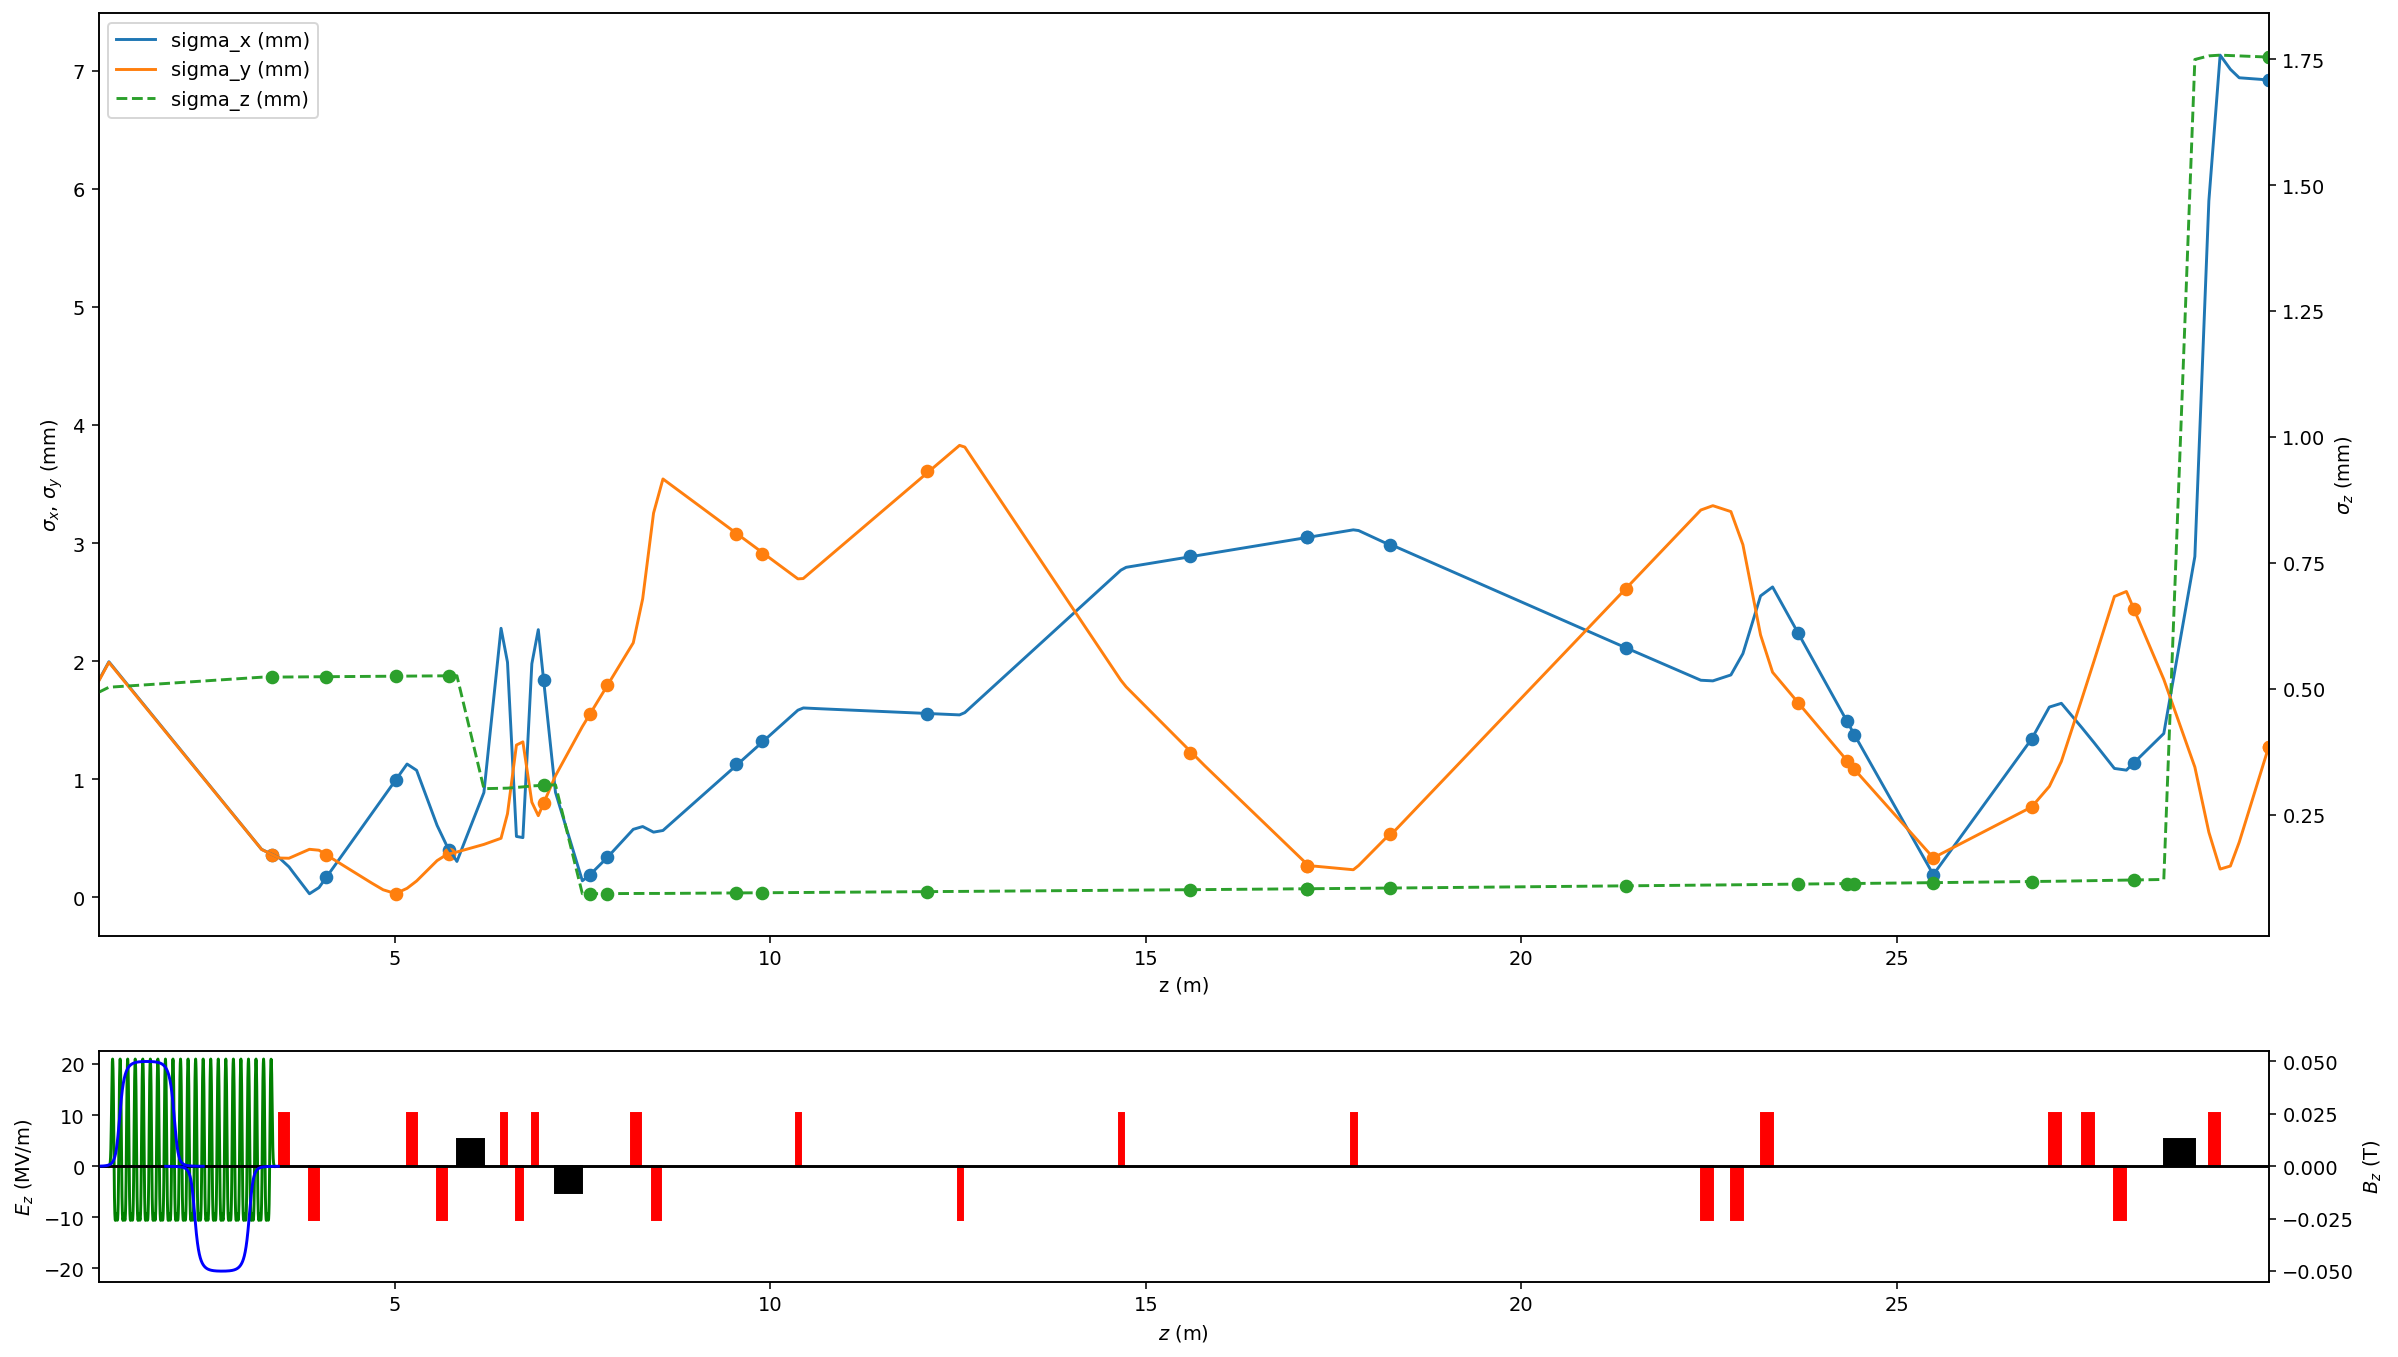

In [39]:
fwdir.plot(include_layout=True, include_particles=True)

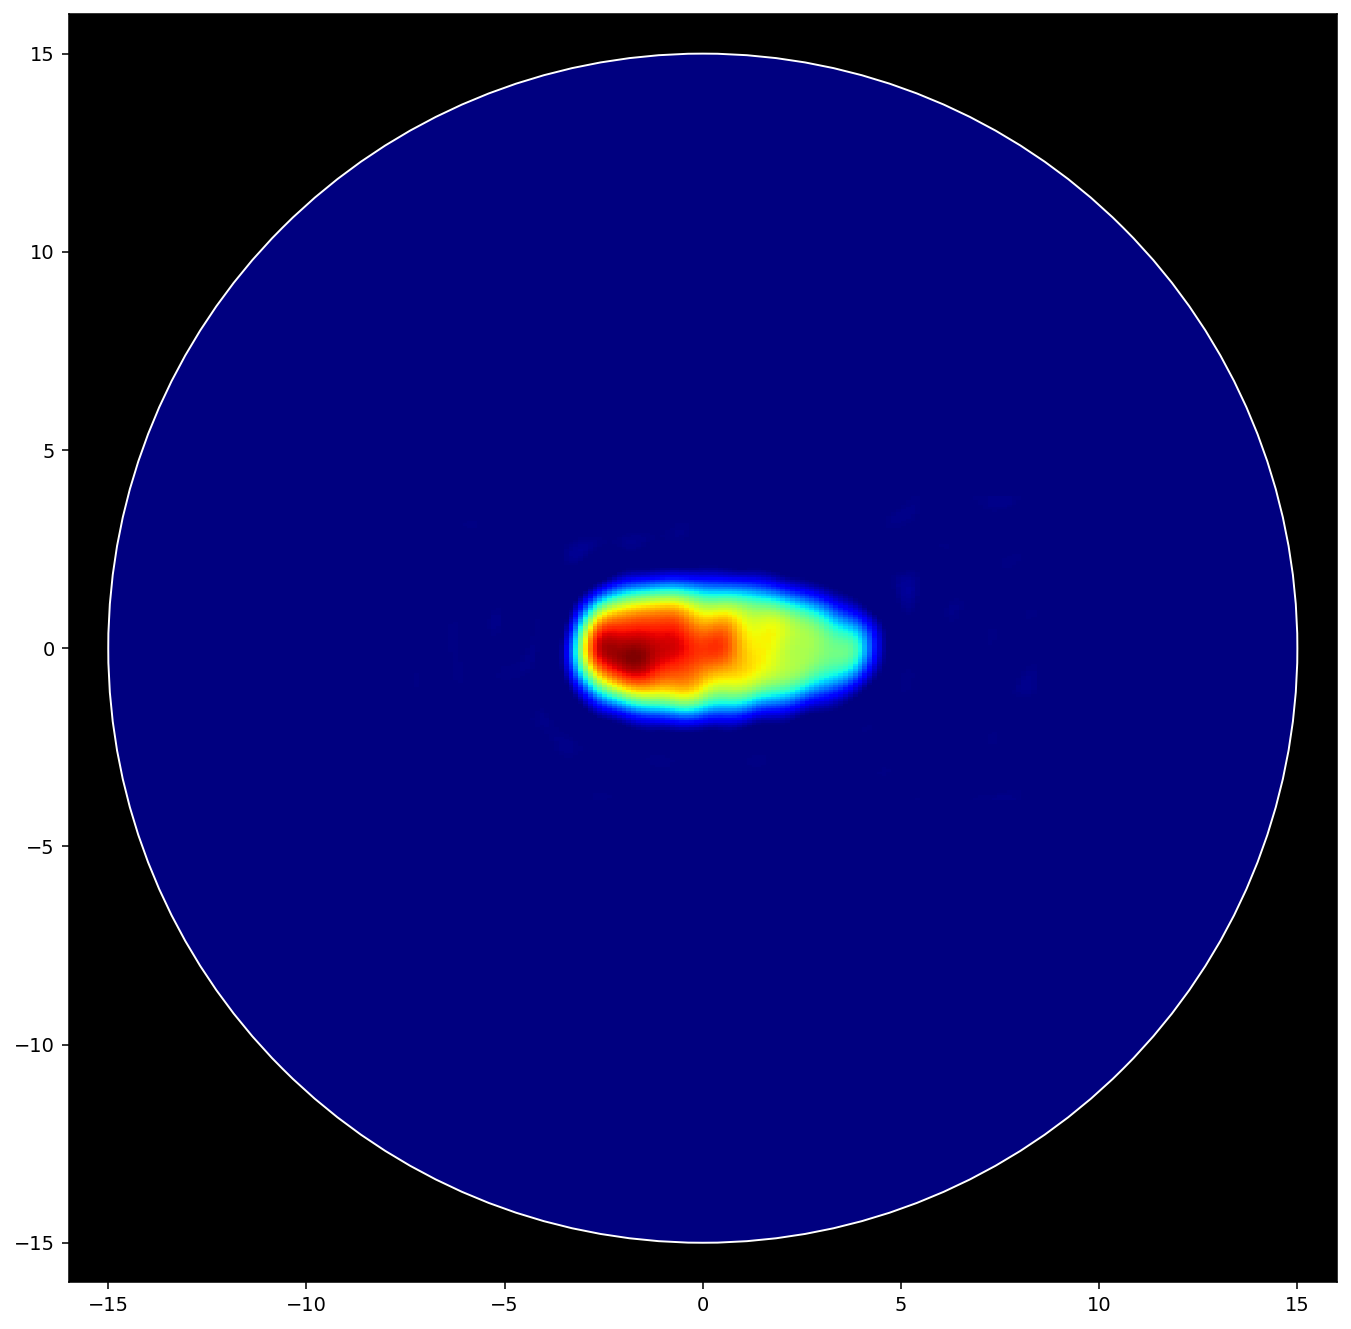

In [27]:
plotScreenImage(fwdir.beams.getScreen('CLA-C2V-DIA-SCR-01'), scale=1, colormap=plt.cm.jet)